### Ernesto Andrés González Lomelí

#### Expediente: 746843

In [72]:
from xgboost import XGBRegressor
import pandas as pd
from sklearn.model_selection import train_test_split

In [73]:
data=pd.read_csv('Advertising.csv')
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [74]:
x = data[['TV', 'radio', 'newspaper']]
y = data['sales']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

In [75]:
model=XGBRegressor(n_estimators=200, max_depth=5, max_leaves=100)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=100,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [76]:
from sklearn.metrics import r2_score

In [77]:
y_pred = model.predict(X_test)

In [78]:
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
r2_train

0.9999998984321496

In [79]:
y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
r2_test

0.9519742652922475

##### OPTIMIZAMOS LOS HIPERPARÁMETROS

In [80]:
from skopt import BayesSearchCV

In [81]:
param_space={
    'n_estimators':(50, 800),
    'max_depth': (2, 40),
    'max_leaves': (10, 800),
    }

In [82]:
opt = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=100, 
    scoring='r2',
    cv=3,
    random_state=42,
    verbose=0
)

In [83]:
opt.fit(X_train, y_train)

BayesSearchCV(cv=3,
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=100, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
              n_iter=100, random_state=42, scoring='r2',
              search_spaces={'max_depth': (2, 40), 'max_leaves': (10, 800),
                             'n_estimators': (50, 800)})

In [84]:
best_model = opt.best_estimator_
r2_train = r2_score(y_train, best_model.predict(X_train))
r2_test = r2_score(y_test, best_model.predict(X_test))

In [85]:
opt.best_params_

OrderedDict([('max_depth', 5), ('max_leaves', 10), ('n_estimators', 756)])

In [86]:
r2_train

0.9999998974413208

In [87]:
r2_test

0.96732286192433

In [88]:
import matplotlib.pyplot as plt

In [91]:
residuos = y_test - y_test_pred

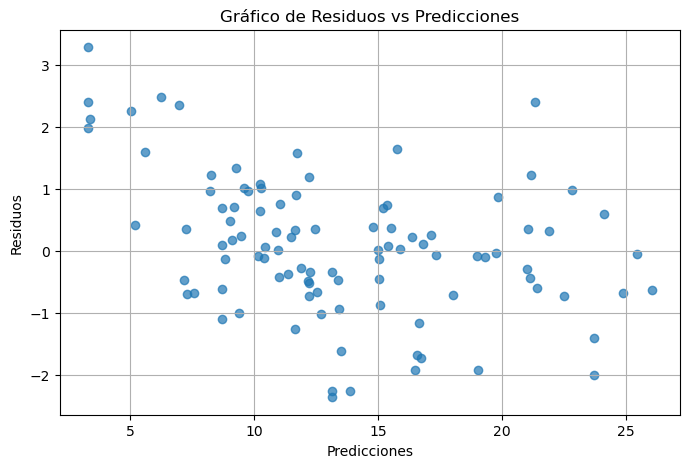

In [94]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test_pred, residuos, alpha=0.7)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs Predicciones")
plt.grid(True)
plt.show()

No hay homocedasticidad ya que la varianza de los residuos no es completamente uniforme a lo largo del rango de predicciones.

In [95]:
import statsmodels.api as sm

In [ ]:
X_reg = sm.add_constant(y_test_pred)  
modelo_lineal = sm.OLS(residuos, X_reg).fit()

In [97]:
print(modelo_lineal.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     16.59
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           9.44e-05
Time:                        17:22:30   Log-Likelihood:                -145.21
No. Observations:                 100   AIC:                             294.4
Df Residuals:                      98   BIC:                             299.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1343      0.279      4.068      0.0

In [98]:
import numpy as np

In [99]:
pendiente = modelo_lineal.params[1]
intercepto = modelo_lineal.params[0]

C:\Users\andre\AppData\Local\Temp\ipykernel_13128\1387588256.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pendiente = modelo_lineal.params[1]
C:\Users\andre\AppData\Local\Temp\ipykernel_13128\1387588256.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercepto = modelo_lineal.params[0]


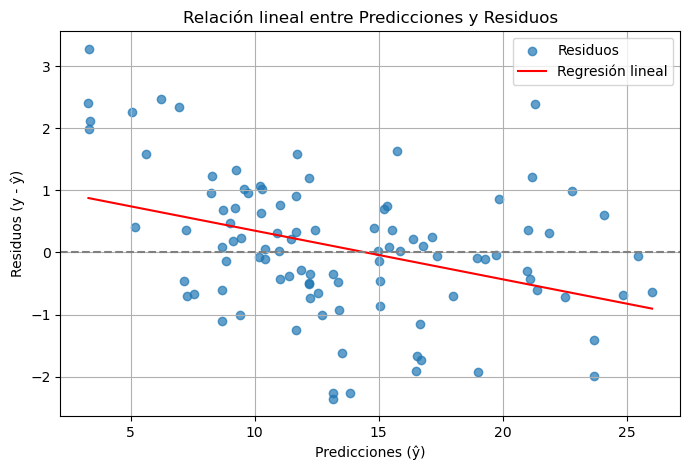

In [ ]:
x_vals = np.linspace(min(y_test_pred), max(y_test_pred), 100)
y_vals = intercepto + pendiente * x_vals

plt.figure(figsize=(8, 5))
plt.scatter(y_test_pred, residuos, alpha=0.7, label='Residuos')
plt.plot(x_vals, y_vals, color='red', label='Regresión lineal')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Relación lineal entre Predicciones y Residuos")
plt.legend()
plt.grid(True)
plt.show()

La pendiente es negativa porque coef = -0.0783 y significativa porque p < 0.0001, lo que nos dice que si hay una relación lineal clara entre las predicciones y los residuos.

El R² de 0.145 indica que 14.5% de la variabilidad de los residuos se explica por las predicciones, lo cual es evidnecia taimbien de que hay relación lineal.

La constante positiva (1.1343) dice que cuando las predicciones son cero, el error esperado es positivo.

A simple vista en la gráfica siento que una linea curva representaría mejor mis datos, pero en este caso creo que por falta de muestras no se refleja bien en la gráfica si es una relación lineal o no.

In [103]:
#Correlación de los resiudos
residuos_array = np.array(residuos)
autocorr = np.corrcoef(residuos_array[:-1], residuos_array[1:])[0, 1]
autocorr

0.16311393325043913

No hay evidencia fuerte de autocorrelación en los residuos.